# Allen Institute
## 01_preprocess
---
## Before you start
- run `make init` cmd in your local env

## WorkFlow
- make configuration
    - a) Normalization
    - b) Formation of datasets for ML
        - Undersampling
        - Data splitting
        - Visualization
        - Format matrix for GBDT
        - c) export
    - d) Formation of a dataset for visualization
        - feature extraction
        - Format matrix for visualization
 
 
 **Notes)**
 
 if kernel dies during running codes, you can ommit completed sections indexed if alphabets

In [1]:
import glob
import json
import os
import random
from typing import Dict, List, NamedTuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse as sp
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

from tools.figure import countplot, cns_markers, fig_kwarg
from tools.preprocess import fmt_rpm,fmt_table, find
import tools.spongy_panda as spd

In [2]:
class Config(NamedTuple):
    files: List[str] = glob.glob("../data/m1_10x/matrix*")[1:]
    data_dir: str = "../data/m1_10x_rpm"
    save_dir: str = "../out/m1_10x/01_preprocess"
    fig_kwarg: Dict[str, Union[str, int, float]] = fig_kwarg
    save_file: bool = False
conf = Config(save_file=True)

In [3]:
os.makedirs(conf.data_dir, exist_ok=True)
os.makedirs(conf.save_dir, exist_ok=True)

---
## a) Normalization
## $Counts\rightarrow \log_2(RPM+1)$
- 1. make `../datam1_10x_rpm` to save file/files
- 2. export

In [ ]:
fmt_rpm(conf.files, conf.data_dir, log2=True)

- as there are no mitochondrial genes in this dataset, QC will be omitted

---
## b) Undersampling
- make every class in metadata has even sample  sizes

In [4]:
idx = pd.read_csv("../data/m1_10x_meta/metadata.csv", index_col=0)

In [5]:
df_mock = pd.DataFrame(
    np.arange(len(idx)),
    index=idx.class_label,
    columns = ["n_idx"]
)

In [6]:
data, label_mock = RandomUnderSampler(random_state=0).fit_resample(df_mock, idx.class_label)

In [7]:
res = idx.iloc[data.n_idx]

In [8]:
res

,exp_component_name,cluster_label,cluster_color,cluster_order,class_label,class_color,class_order,subclass_label,subclass_color,subclass_order,...,cell_type_designation_label,cell_type_designation_color,cell_type_designation_order,external_donor_name_label,external_donor_name_color,external_donor_name_order,specimen_type,full_genotype_label,outlier_call,outlier_type
sample_name,,,,,,,,,,,,,,,,,,,,,
TCACTCGTCACCCATC-LKTX_190130_01_B01,TCACTCGTCACCCATC-29L8TX_180927_004_B01,Inh L5-6 PVALB ZFPM2-AS1,#be001e,60,GABAergic,#FF7373,1,Pvalb,#D93137,6,...,Neuron 60,#be001e,60,H18.30.002,#3DCCCC,2,nucleus,NaN,False,NaN
GTGTGGCGTTACCCTC-LKTX_190130_01_H01,GTGTGGCGTTACCCTC-35L8TX_181108_001_D01,Inh L3-5 SST GGTLC3,#f4b028,46,GABAergic,#FF7373,1,Sst,#FF9900,5,...,Neuron 46,#f4b028,46,H18.30.001,#FF7373,1,nucleus,NaN,False,NaN
AACCATGCAATTTCCT-LKTX_190129_01_A01,AACCATGCAATTTCCT-21L8TX_180927_001_A01,Inh L2-5 PVALB RPH3AL,#d7003c,64,GABAergic,#FF7373,1,Pvalb,#D93137,6,...,Neuron 64,#d7003c,64,H18.30.001,#FF7373,1,nucleus,NaN,False,NaN
CTCAGAAGTTAGGCCC-LKTX_190130_01_A01,CTCAGAAGTTAGGCCC-28L8TX_180927_004_A01,Inh L1-2 VIP EXPH5,#a00097,20,GABAergic,#FF7373,1,Vip,#B864CC,3,...,Neuron 20,#a00097,20,H18.30.002,#3DCCCC,2,nucleus,NaN,False,NaN
AACGAAACAGAGTCAG-LKTX_190129_01_A01,AACGAAACAGAGTCAG-21L8TX_180927_001_A01,Inh L2-5 PVALB RPH3AL,#d7003c,64,GABAergic,#FF7373,1,Pvalb,#D93137,6,...,Neuron 64,#d7003c,64,H18.30.001,#FF7373,1,nucleus,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTAGCACCGAA-LKTX_190130_01_H01,TTTGACTAGCACCGAA-35L8TX_181108_001_D01,Oligo L2-6 OPALIN FTH1P3,#003a28,120,Non-Neuronal,#171799,3,Oligo,#2E3E39,17,...,Non-neuron 3,#003a28,120,H18.30.001,#FF7373,1,nucleus,NaN,False,NaN
TTTGATCGTGGAACAC-LKTX_190130_01_H01,TTTGATCGTGGAACAC-35L8TX_181108_001_D01,Oligo L3-6 OPALIN ENPP6,#1a3329,119,Non-Neuronal,#171799,3,Oligo,#2E3E39,17,...,Non-neuron 2,#1a3329,119,H18.30.001,#FF7373,1,nucleus,NaN,False,NaN
TTTGGTTGTAATTAGG-LKTX_190130_01_H01,TTTGGTTGTAATTAGG-35L8TX_181108_001_D01,Oligo L2-6 OPALIN FTH1P3,#003a28,120,Non-Neuronal,#171799,3,Oligo,#2E3E39,17,...,Non-neuron 3,#003a28,120,H18.30.001,#FF7373,1,nucleus,NaN,False,NaN


---
## Data Spliting 
- split into training/test data

In [9]:
trainx, testx, trainy, testy = train_test_split(
    res, res,
    test_size=0.2, random_state=0
)

In [10]:
with open(f"../data/m1_10x_sample_separation.json", mode="w") as f:
    dicts = {
        name: data.index.to_list() for name, data in zip(
            ["train", "test"], 
            [trainy, testy]
        )
    }
    json.dump(dicts, f)

---
## Visualization

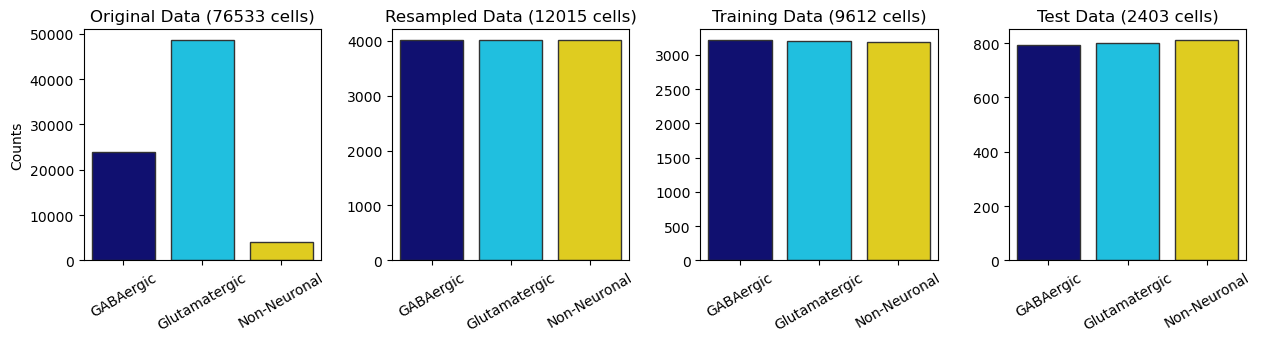

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(15, 3))
plt.subplots_adjust(wspace=0.3)

ticklabel = res.sort_values("class_label").class_label.unique()

for (i, v), title in zip(
    enumerate([idx, res, trainy, testy]),
    ["Original Data", "Resampled Data", "Training Data", "Test Data"]
):
    label = idx.loc[v.index, :].sort_values("class_label").class_label
    
    countplot(data=v, label=label, cmap="jet", ax=ax[i])
    ax[i].set_xticklabels(ticklabel, rotation=30)
    ax[i].set_ylabel("Counts" if i == 0 else "")
    ax[i].set(title=f"{title} ({len(v)} cells)")

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/counts.png", **conf.fig_kwarg)

---
## Format matrix for GBDT (referential data)
## $\log_2(RPM+1)\rightarrow \log_2(RPM+1)$
- 1. set configuration
- 2. make `../datam1_10x_processed` to save files
- 3. get submatrix
- 4. split data
- 5. export training/test data

In [12]:
conf = Config(
    files=glob.glob("../data/m1_10x_rpm/*"),
    save_dir="../data/m1_10x_ml"
)

In [13]:
os.makedirs(conf.save_dir, exist_ok=True)

In [21]:
df = fmt_table(
    l_data=conf.files,
    save_dir=conf.save_dir,
    filenames="resampled_whole_log",
    rownames=res.index,
    save_as_csv=True
)

extraction:   0%|          | 0/39 [00:00<?, ?it/s]

removing artifacts:   0%|          | 0/39 [00:00<?, ?it/s]

In [14]:
if f"{conf.save_dir}/resampled_whole_log.csv" in glob.glob(f"{conf.save_dir}/*"):
    df = pd.read_csv(f"{conf.save_dir}/resampled_whole_log.csv", index_col=0)

In [15]:
for name, data in tqdm(
    zip(["train", "test"], [trainy, testy]),
    desc="Exporting", total=2
):
    df.loc[data.index, :].to_csv(f"{conf.save_dir}/{name}_whole_log.csv", index=True)
    df.loc[data.index, :].to_pickle(f"{conf.save_dir}/{name}_whole_log.pkl")

Exporting:   0%|          | 0/2 [00:00<?, ?it/s]

---
## Feature extraction 

In [71]:
class Config(NamedTuple):
    files=glob.glob("../data/m1_10x_rpm/*")
    feat: List[str] = cns_markers
    create_new_json: bool = False
    json_path: str = "../data/gene_list.json"
    data_idx: str = "m1_10x"
    save_dir: str =  "../data/m1_10x_viz"

In [72]:
conf = Config(create_new_json = True)

In [73]:
os.makedirs(conf.save_dir, exist_ok=True)

In [75]:
gene_list = open(conf.files[0]).readline().split(",")[1:]

if not conf.create_new_json:
    with open(conf.json_path, mode="r") as f:
        dicts = json.load(f)
        dicts = dicts if conf.data_idx in dicts\
            else {conf.data_idx: gene_list, **dicts}
    
with open(conf.json_path, mode="w") as f:
    dicts = {conf.data_idx: gene_list} if conf.create_new_json else dicts
    json.dump(dicts, f)

In [76]:
# utils.preprocess.find returns a list of missing genes

find(gene_list, conf.feat)

[]

### random sampling

In [77]:
np.random.seed(0)

random_genes = random.choices(gene_list, k=500)

feat = np.unique(conf.feat + random_genes)

In [78]:
df = fmt_table(
    conf.files, conf.save_dir,
    "orig_markers+_log",
    colnames=feat,
    save_as_csv=True
)

extraction:   0%|          | 0/39 [00:00<?, ?it/s]

removing artifacts:   0%|          | 0/39 [00:00<?, ?it/s]

In [79]:
df.head()

,PERM1,LOC105378586,CHD5,LOC105376736,LOC101927663,C1QB,PAQR7,RNA5SP42,LOC100419802,EVA1B,...,HSPA8P7,PNPLA10P,MIR513C,PLXNA3,TTTY8B,ZNF736P8Y,PABPC1P5,FAM8A10P,BPY2C,ND4
$\log_2(RPM+1)$,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGATTTCC-LKTX_190129_01_A01,0.0,0.00000,8.123371,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.120782
AAACCCAAGTATGGCG-LKTX_190129_01_A01,0.0,0.00000,6.394827,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.702974
AAACCCACAAAGTGTA-LKTX_190129_01_A01,0.0,5.97878,5.978780,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.958623
AAACCCACACTACTTT-LKTX_190129_01_A01,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.969392
AAACCCACAGTGAGCA-LKTX_190129_01_A01,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.594203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.594203


In [80]:
df.to_pickle(f"{conf.save_dir}/orig_markers+_log.pkl")